# NLP LAB 5
### Zaidan Mufaddhal - AIU20092029

## 1. Spam Classification

### Step 1-1 Data collection and understanding

In [1]:
import pandas as pd

In [2]:
#Read the data
Email_Data = pd.read_csv('C:/Users/zaida/Downloads/spam.csv', encoding = 'latin1')

In [3]:
#Data understanding
Email_Data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
Email_Data = Email_Data[['v1','v2']]
Email_Data = Email_Data.rename(columns={'v1':'Target','v2':'Email'})
Email_Data.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 1-2 Text processing and feature engineering

In [5]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [6]:
#pre processing steps like lower case, stemming and lemmatization
Email_Data['Email']=Email_Data['Email'].apply(lambda x:
                                             ''.join(x.lower() for x in x.split()))
stop = stopwords.words('english')
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: ''.join
                                               (x for x in x.split() if x not in stop))
st = PorterStemmer()

In [7]:
Email_Data['Email'] = Email_Data['Email'].apply(lambda x:''.join
                                                ([st.stem(word) for word in x.split()]))
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: ''.join
                                               ([Word(word).lemmatize() for word in x.split()]))
Email_Data.head()

,Target,Email
0,ham,"gountiljurongpoint,crazy..availableonlyinbugis..."
1,ham,oklar...jokingwifuoni...
2,spam,freeentryin2awklycomptowinfacupfinaltkts21stma...
3,ham,udunsaysoearlyhor...ucalreadythensay...
4,ham,"nahidon'tthinkhegoestousf,helivesaroundherethough"


In [8]:
#Splitting data into train and validation
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Email_Data['Email'],
                                                                     Email_Data['Target'])

In [9]:
#TFIDF feature generation for a maximum of 5000 features
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                            token_pattern = r'\w{1,}', max_features = 5000)
tfidf_vect.fit(Email_Data['Email'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
xtrain_tfidf.data

array([0.74424778, 0.66790362, 0.40131569, ..., 0.60575979, 0.68677158,
       0.40174603])

### Step 1-3 Model Training

In [10]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    #fit the training dataset on the classifier
    classifier.fit(feature_vector_train,label)
    #predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)

#### Naive Bayes training

In [11]:
accuracy = train_model(naive_bayes.MultinomialNB(alpha=0.2),
                       xtrain_tfidf, train_y, xvalid_tfidf)
print('Accuracy: ', accuracy)

Accuracy:  0.964824120603015


#### Logistic Regression Classifier

In [12]:
# Linear Classifier on Word level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(),
                      xtrain_tfidf, train_y, xvalid_tfidf)
print ('Accuracy: ', accuracy)

Accuracy:  0.8908829863603733


#### Support Vector Classifier

In [13]:
# Support Vector Classifier on Word level TF IDF Vectors
accuracy = train_model(svm.SVC(),
                      xtrain_tfidf, train_y, xvalid_tfidf)
print ('Accuracy: ', accuracy)

Accuracy:  0.9368269921033741


#### Decision Tree Classifier

In [14]:
# Decision Tree on Word level TF IDF vectors
from sklearn import tree
accuracy = train_model(tree.DecisionTreeClassifier(),
                      xtrain_tfidf, train_y, xvalid_tfidf)
print ('Accuracy: ', accuracy)

Accuracy:  0.955491744436468


#### Random Forest Classifier

In [15]:
# Random Forest on word level TF IDF vectors
from sklearn.ensemble import RandomForestClassifier

accuracy = train_model(RandomForestClassifier(),
                      xtrain_tfidf, train_y, xvalid_tfidf)
print('Accuracy: ', accuracy)

Accuracy:  0.9540559942569993


#### Multi-Layer Perceptron Classifier

In [16]:
# ANN (Multi-Layer Perceptron Classifier (MLP)) on word level TF IDF vectors
from sklearn.neural_network import MLPClassifier

accuracy = train_model(MLPClassifier(),
                      xtrain_tfidf, train_y, xvalid_tfidf)
print('Accuracy: ', accuracy)

Accuracy:  0.9626704953338119


## 2. Sentiment Analysis

In [17]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# read the data
df = pd.read_csv('C:/Users/zaida/Downloads/Reviews.csv')

In [19]:
# look at the top 5 rows
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [20]:
# understand the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [21]:
#looking at the summary of the reviews
df.Summary.head(5)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [22]:
# looking at the description of the reviews
df.Text.head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

### Text preprocessing

In [23]:
# import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [24]:
# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x:''.join
                              (x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df.Text.head(5)

C:\Users\zaida\AppData\Local\Temp\ipykernel_13140\2113006196.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]','')


0    ihaveboughtseveralofthevitalitycanneddogfoodpr...
1    productarrivedlabeledasjumbosaltedpeanutsthepe...
2    thisisaconfectionthathasbeenaroundafewcenturie...
3    ifyouarelookingforthesecretingredientinrobitus...
4    greattaffyatagreatpricetherewasawideassortment...
Name: Text, dtype: object

In [25]:
# removal of stop words
stop= stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x:''.join(x for x in x.split() if x not in stop))
df.Text.head(5)

0    ihaveboughtseveralofthevitalitycanneddogfoodpr...
1    productarrivedlabeledasjumbosaltedpeanutsthepe...
2    thisisaconfectionthathasbeenaroundafewcenturie...
3    ifyouarelookingforthesecretingredientinrobitus...
4    greattaffyatagreatpricetherewasawideassortment...
Name: Text, dtype: object

In [ ]:
# spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df.Text.head(5)

In [ ]:
# Lemmatization
df['Text'] = df['Text'].apply(lambda x:''.join([Word(word).lemmatize() for word in x.split()]))
df.Text.head(5)

### Exploratory data analysis

In [26]:
# create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df

In [27]:
# dropping null values
reviews.dropna(inplace=True)

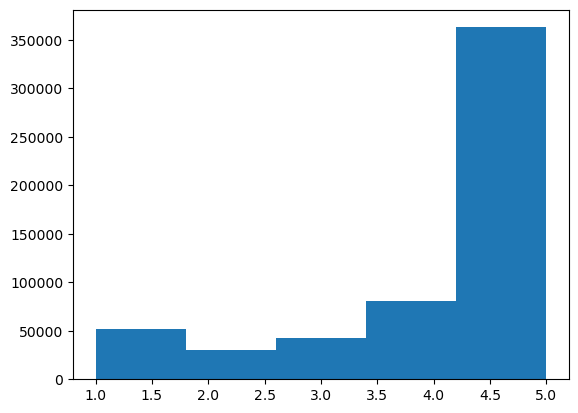

Score
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Id, dtype: int64


In [28]:
# the histogram reveals this dataset is highly unbalanced towrds high rating
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [29]:
# to make it balanced data, we sampled each score by the lowest n-count from above (i.e. 29283 reviews scored as '2')
score_1 = reviews[reviews['Score'] == 1].sample(n=29743)
score_2 = reviews[reviews['Score'] == 2].sample(n=29743)
score_3 = reviews[reviews['Score'] == 3].sample(n=29743)
score_4 = reviews[reviews['Score'] == 4].sample(n=29743)
score_5 = reviews[reviews['Score'] == 5].sample(n=29743)

In [30]:
# here we recreate a 'balanced' dataset
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

In [31]:
# printing count by 'Score' to check dataset is now balanced
print(reviews_sample.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


In [32]:
# let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS

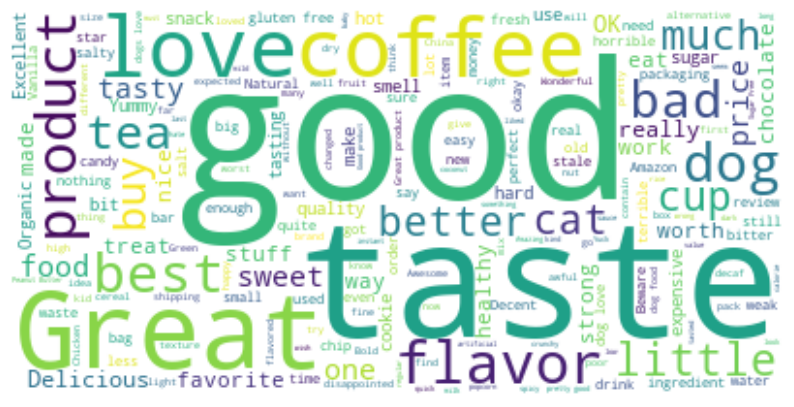

In [33]:
# Wordcloud function's input needs to be a single string of text
# Here I'm concatenating all summaries into a single string
# Similarly you can build for text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
# now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]

In [35]:
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

In [36]:
# create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

Text(0.5, 1.0, 'Reviews with Negative Scores')

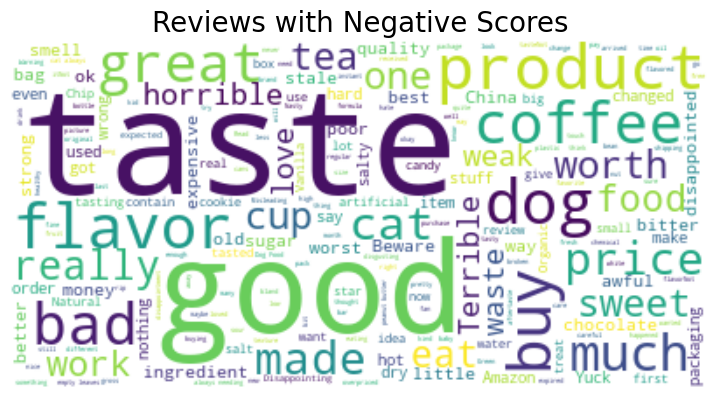

In [37]:
# plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Negative Scores',fontsize=20)

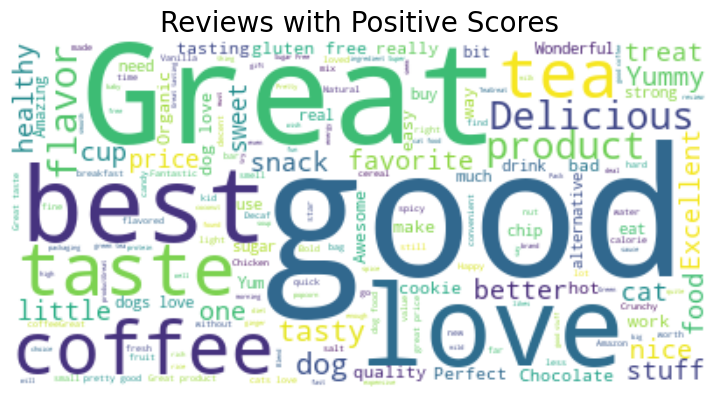

In [38]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

### Sentiment Scores

In [39]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

In [40]:
#!pip install vaderSentiment

In [41]:
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [43]:
# generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [44]:
# creating new dataframe with sentiments
df_sentiments = pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [45]:
# merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,ihaveboughtseveralofthevitalitycanneddogfoodpr...,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,ihaveboughtseveralofthevitalitycanneddogfoodpr...
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,productarrivedlabeledasjumbosaltedpeanutsthepe...,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,productarrivedlabeledasjumbosaltedpeanutsthepe...
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",thisisaconfectionthathasbeenaroundafewcenturie...,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",thisisaconfectionthathasbeenaroundafewcenturie...


In [48]:
# covert scores into postiive and negative sentiments using some threshold
df_sentiments['Sentiment'] = np.where(df_sentiments['compound'] >= 0, 'Positive', 'Negative')
df_sentiments.head(5)

,neg,neu,pos,compound,Sentiment
0,0.0,1.0,0.0,0.0,Positive
1,0.0,1.0,0.0,0.0,Positive
2,0.0,1.0,0.0,0.0,Positive
3,0.0,1.0,0.0,0.0,Positive
4,0.0,1.0,0.0,0.0,Positive


### Business Insight

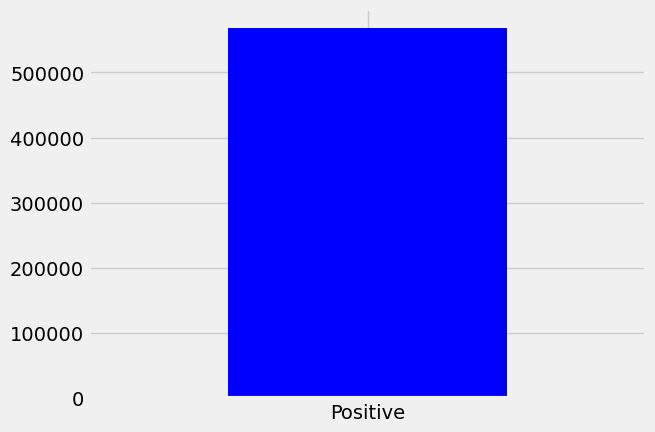

In [49]:
result = df_sentiments['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color='blue');